In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import scale


In [2]:
normalization = True
def normalize_features(X, lpc_max_order):
    norm_X = np.zeros(X.shape)
    n_features = X.shape[1]
    n_skip = n_features // lpc_max_order
    for f in np.arange(n_features):
        norm_X[:, f::n_skip] = scale(X[:, f::n_skip])
    return norm_X

### Extract train features

In [3]:
X_train_bonafide_list = []
X_train_spoof_list = []
max_lpc_order = 50
lpc_lengths = np.arange(1, max_lpc_order + 1)


for l in lpc_lengths:
    train_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/train_LPC_' + str(l) +'.pkl')
    #train_features.drop('coeff', axis=1, inplace=True)
    train_features.dropna(inplace=True)
    
    train_bonafide_features = train_features[train_features['label']=='bonafide']
    train_spoof_features = train_features[train_features['label']=='spoof']
    
    if l==1:
        train_spoof_features = train_features[train_features['label']=='spoof'].sample(
            n=train_bonafide_features.shape[0])
        selected_files = train_spoof_features['audio_filename']
    else:
        train_spoof_features = train_spoof_features[train_spoof_features['audio_filename'].isin(selected_files)]
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_var']).reshape((-1, 1)))


    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_var']).reshape((-1, 1)))





In [4]:
train_features

,start_voice,end_voice,lpc_res_mean,lpc_res_max,lpc_res_min,lpc_res_var,lpc_gain_mean,lpc_gain_max,lpc_gain_min,lpc_gain_var,...,ltp_res_min,ltp_res_var,ltp_gain_mean,ltp_gain_max,ltp_gain_min,ltp_gain_var,speaker_id,audio_filename,system_id,label
0,7680.0,54719.0,0.000137,0.021835,-0.027288,0.000137,626.730245,8217.439043,1.404993,2.462253e+06,...,-0.016340,0.000101,1.266452,4.027678,1.068358,0.131375,LA_0079,LA_T_1138215,-,bonafide
1,8160.0,67679.0,0.000070,0.016139,-0.019598,0.000070,2838.673282,170116.404878,1.235620,2.191384e+08,...,-0.011847,0.000058,1.220221,4.706324,1.041708,0.068551,LA_0079,LA_T_1271820,-,bonafide
2,18240.0,42239.0,0.000141,0.024620,-0.029850,0.000141,272.325103,4390.400155,1.647057,5.828478e+05,...,-0.016302,0.000097,1.246960,3.434502,1.079782,0.130723,LA_0079,LA_T_1272637,-,bonafide
3,6720.0,44639.0,0.000104,0.024322,-0.030141,0.000104,2480.652489,60329.141291,1.914692,7.081267e+07,...,-0.019430,0.000088,1.248164,3.151442,1.062743,0.073647,LA_0079,LA_T_1276960,-,bonafide
4,9120.0,52799.0,0.000168,0.027242,-0.032055,0.000168,938.292869,8807.734576,1.095756,4.183358e+06,...,-0.021293,0.000145,1.186312,3.422221,1.062075,0.037548,LA_0079,LA_T_1341447,-,bonafide
5,18240.0,34559.0,0.000139,0.024550,-0.033116,0.000139,93.860977,801.750230,2.276194,1.906974e+04,...,-0.021625,0.000112,1.210358,2.181834,1.055357,0.035590,LA_0079,LA_T_1363611,-,bonafide
6,6720.0,33119.0,0.000058,0.017676,-0.022900,0.000058,639.877318,8288.169327,1.458398,2.217561e+06,...,-0.013023,0.000044,1.249128,2.653719,1.073408,0.053464,LA_0079,LA_T_1596451,-,bonafide
7,8640.0,31199.0,0.000080,0.018198,-0.026299,0.000080,90.918112,582.533927,1.671713,1.496035e+04,...,-0.014314,0.000061,1.323803,6.921853,1.061492,0.353750,LA_0079,LA_T_1608170,-,bonafide
8,8640.0,37919.0,0.000434,0.037348,-0.043968,0.000434,2360.828610,90585.612126,1.925676,1.507585e+08,...,-0.021709,0.000180,1.576451,20.308203,1.065591,3.477495,LA_0079,LA_T_1684951,-,bonafide
9,6240.0,47519.0,0.000082,0.021962,-0.029128,0.000082,971.243284,41238.120295,1.529389,2.036393e+07,...,-0.016255,0.000062,1.272755,4.870164,1.068648,0.178039,LA_0079,LA_T_1699801,-,bonafide


In [5]:
X_train_bonafide = np.concatenate(X_train_bonafide_list, axis=1)
X_train_spoof = np.concatenate(X_train_spoof_list, axis=1)
X_train = np.concatenate((X_train_bonafide, X_train_spoof), axis=0)

y_train_bonafide = np.ones((X_train_bonafide.shape[0],))
y_train_spoof = np.zeros((X_train_spoof.shape[0],))

y_train = np.concatenate((y_train_bonafide, y_train_spoof), axis=0)

In [6]:
print(np.array(X_train_bonafide_list).shape)

(800, 2518, 1)


In [7]:
feature_list = ['lpc_res_mean', 'lpc_res_max', 'lpc_res_min', 
                'lpc_res_var', 'lpc_gain_max', 'lpc_gain_min', 'lpc_gain_mean', 'lpc_gain_var',
                'ltp_res_mean', 'ltp_res_max', 'ltp_res_min', 
                'ltp_res_var', 'ltp_gain_max', 'ltp_gain_min', 'ltp_gain_mean', 'ltp_gain_var']

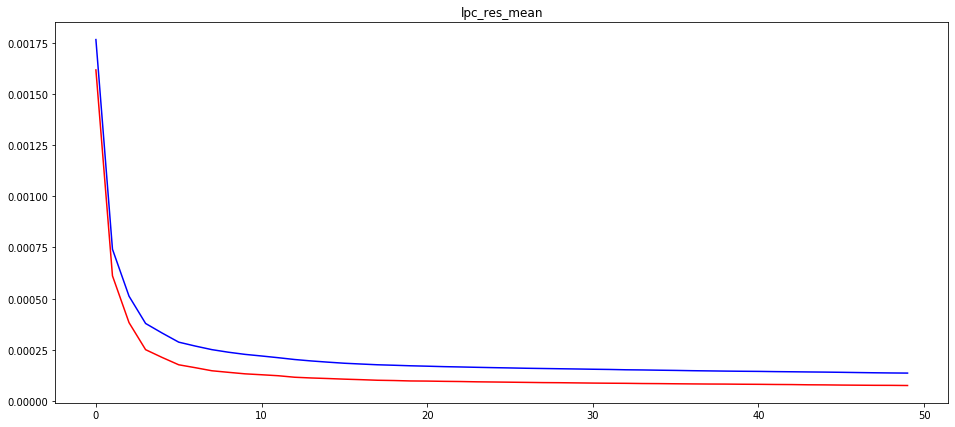

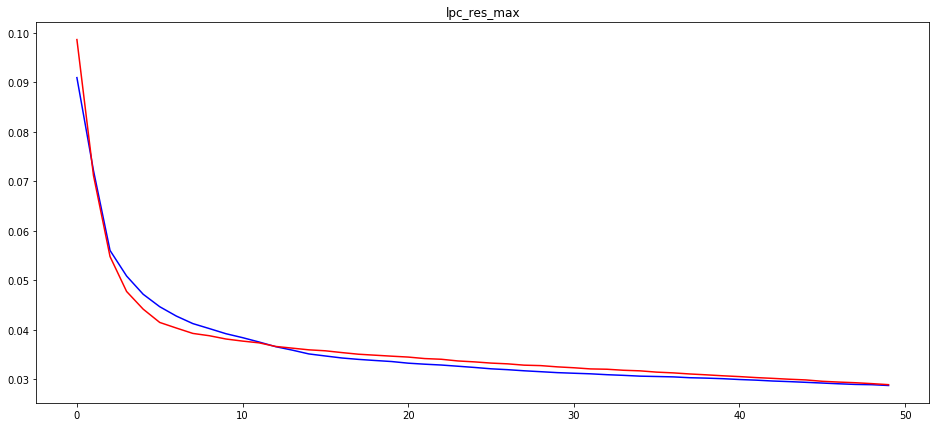

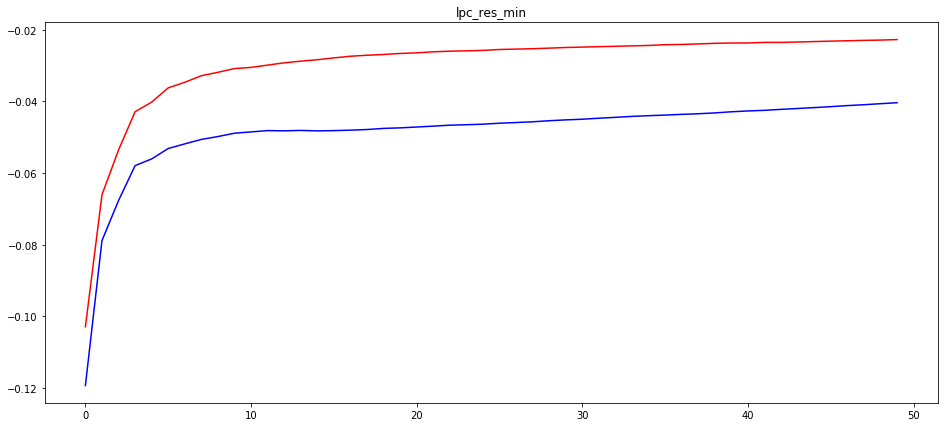

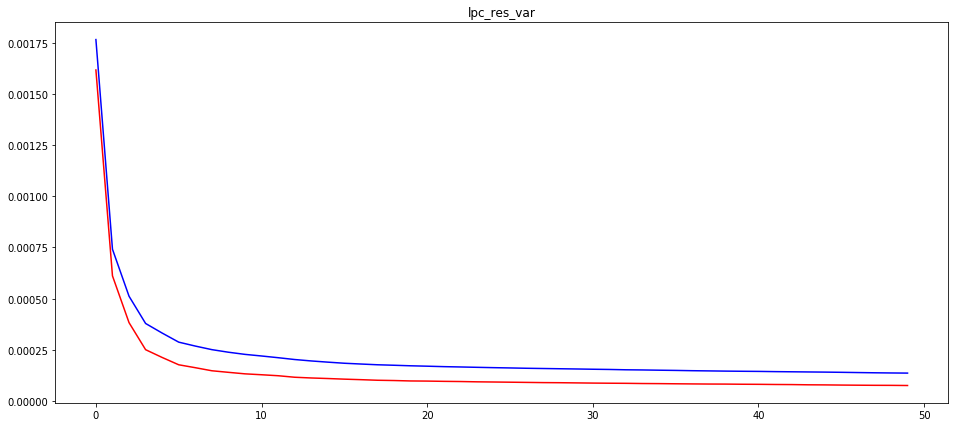

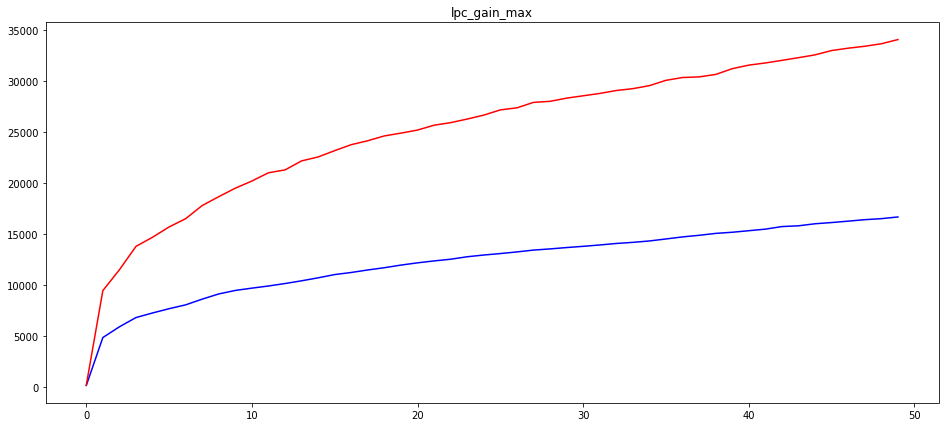

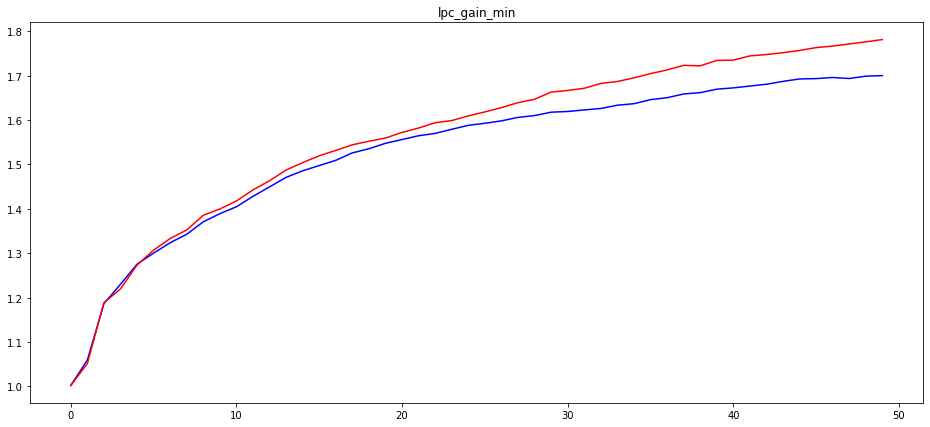

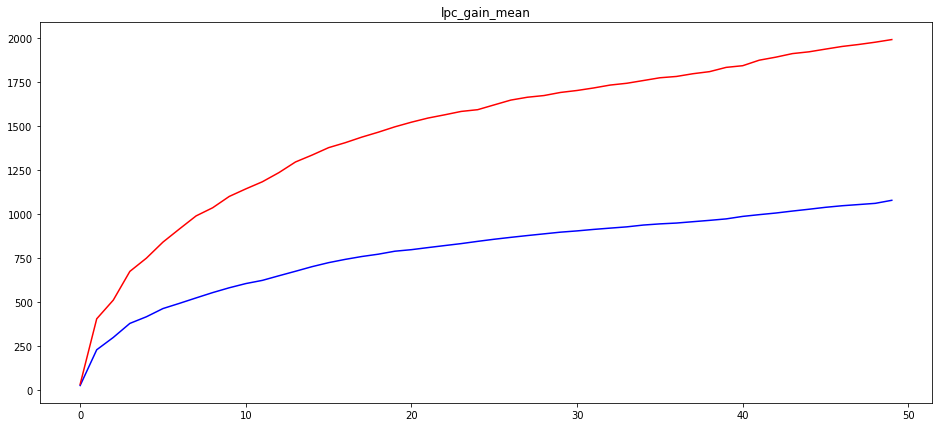

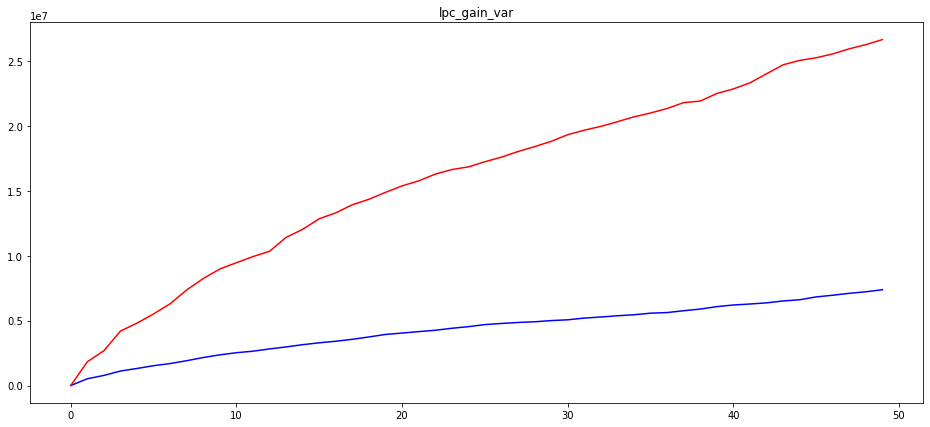

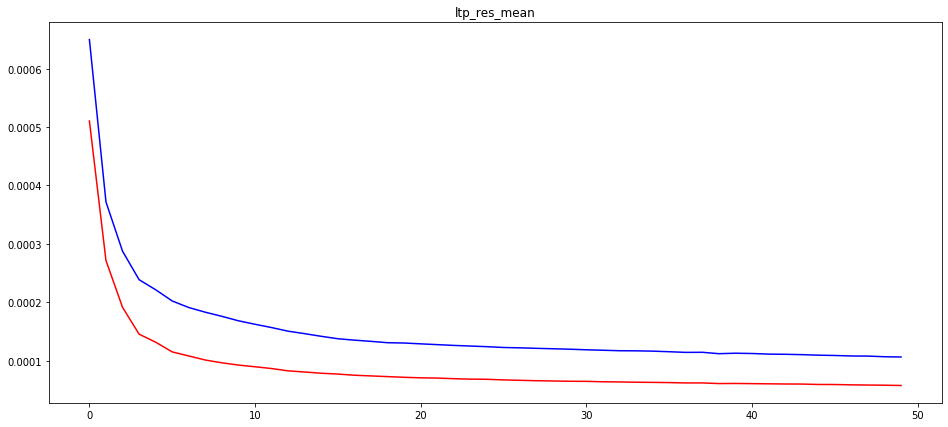

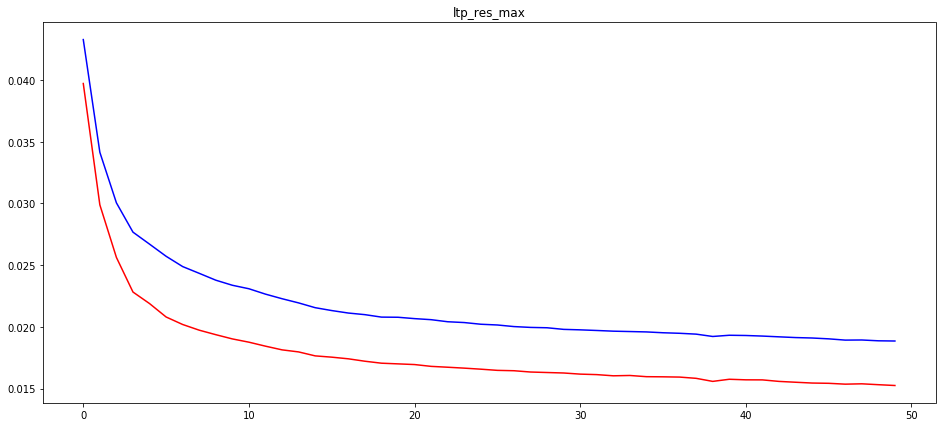

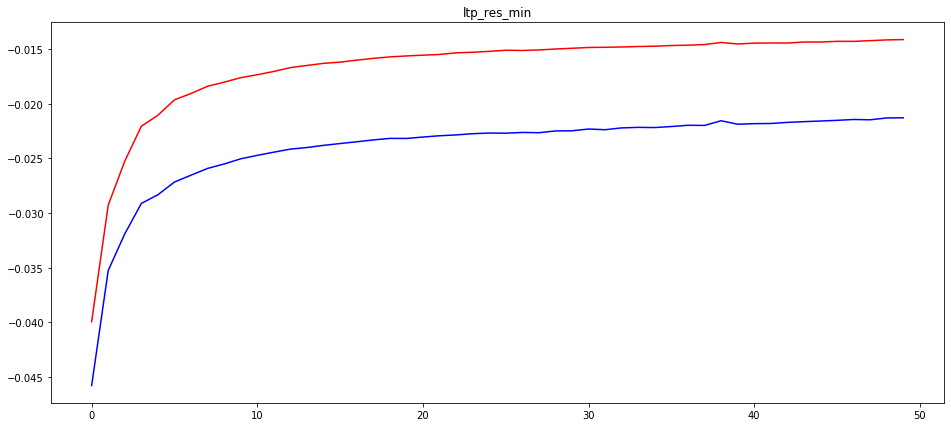

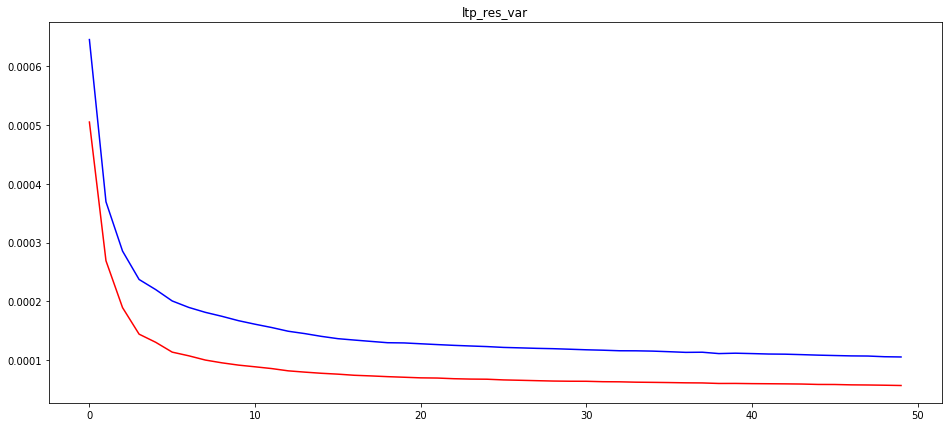

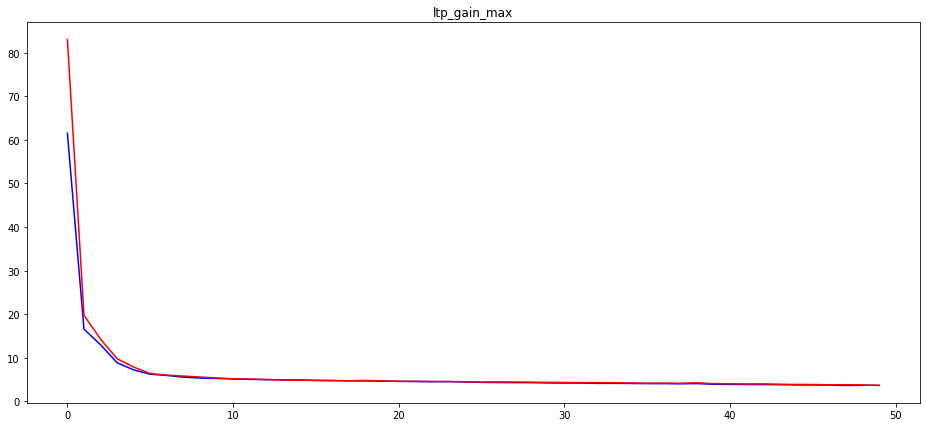

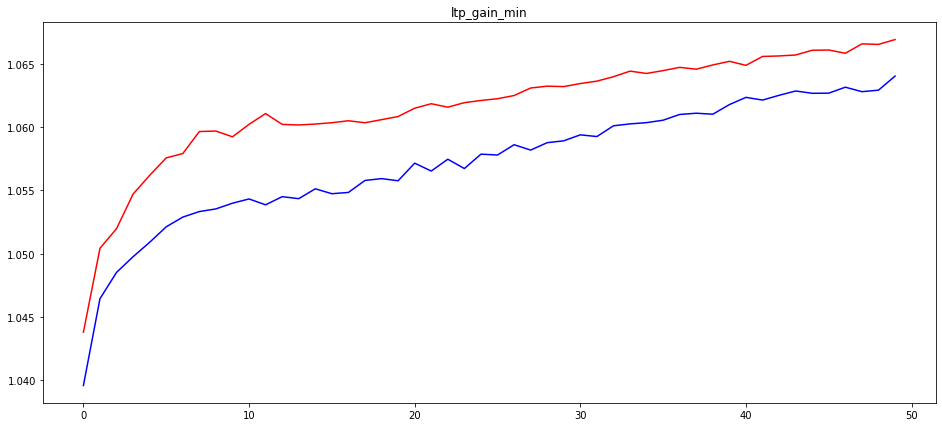

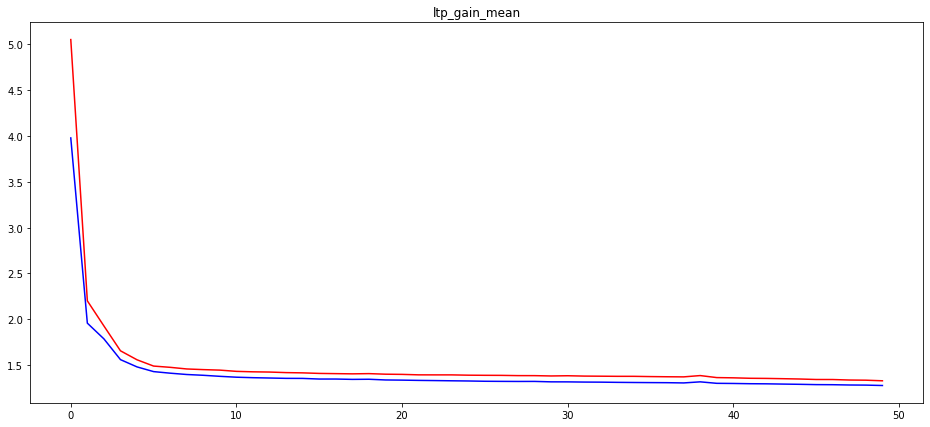

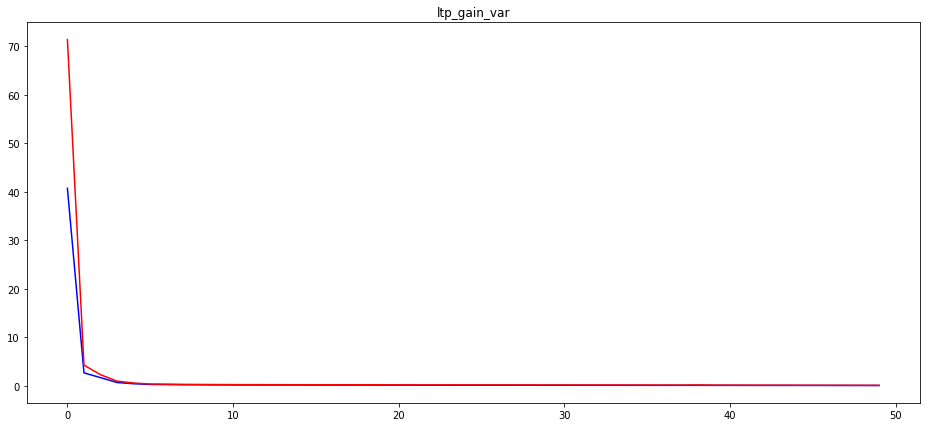

In [8]:
for i in np.arange(16):
    plt.figure(figsize=(16,7))
    feature_index = i
    plt.plot(np.nanmedian(X_train_bonafide[:, feature_index::16], axis=0), color='blue')
    plt.plot(np.nanmedian(X_train_spoof[:, feature_index::16], axis=0), color='red')
    plt.title(feature_list[i])

### Extract dev features

In [9]:
X_dev_bonafide_list = []
X_dev_spoof_list = []

for l in lpc_lengths:
    dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/dev_LPC_' + str(l) +'.pkl')
    #dev_features.drop('coeff', axis=1, inplace=True)
    dev_features.dropna(inplace=True)  
    
    dev_bonafide_features = dev_features[dev_features['label']=='bonafide']
    dev_spoof_features = dev_features[dev_features['label']=='spoof']
    
    if l==1:
        dev_spoof_features = dev_features[dev_features['label']=='spoof'].sample(n=dev_bonafide_features.shape[0])
        selected_files = dev_spoof_features['audio_filename']
    else:
        dev_spoof_features = dev_spoof_features[dev_spoof_features['audio_filename'].isin(selected_files)]
    
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_var']).reshape((-1, 1)))
    
    X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_mean']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_max']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_min']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_var']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_max']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_min']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_var']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_mean']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_max']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_min']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_var']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_max']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_min']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
    X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_var']).reshape((-1, 1)))

In [10]:
X_dev_bonafide = np.concatenate(X_dev_bonafide_list, axis=1)
X_dev_spoof = np.concatenate(X_dev_spoof_list, axis=1)
X_dev = np.concatenate((X_dev_bonafide, X_dev_spoof), axis=0)

y_dev_bonafide = np.ones((X_dev_bonafide.shape[0],))
y_dev_spoof = np.zeros((X_dev_spoof.shape[0],))

y_dev = np.concatenate((y_dev_bonafide, y_dev_spoof), axis=0)

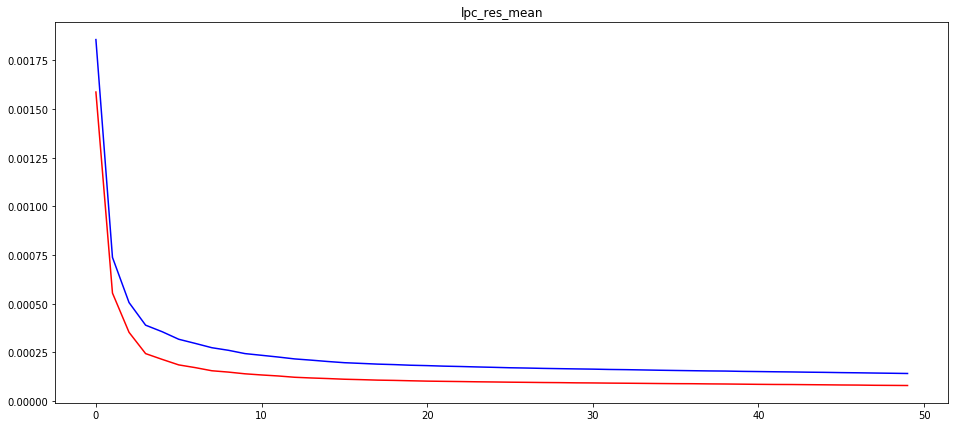

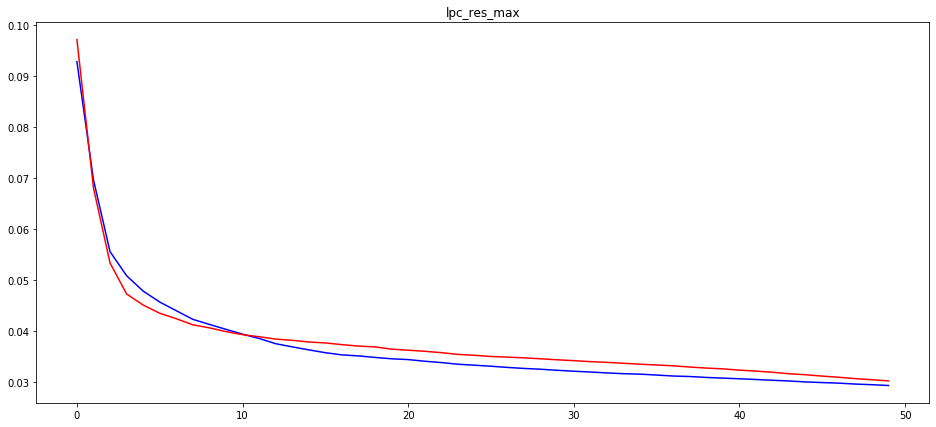

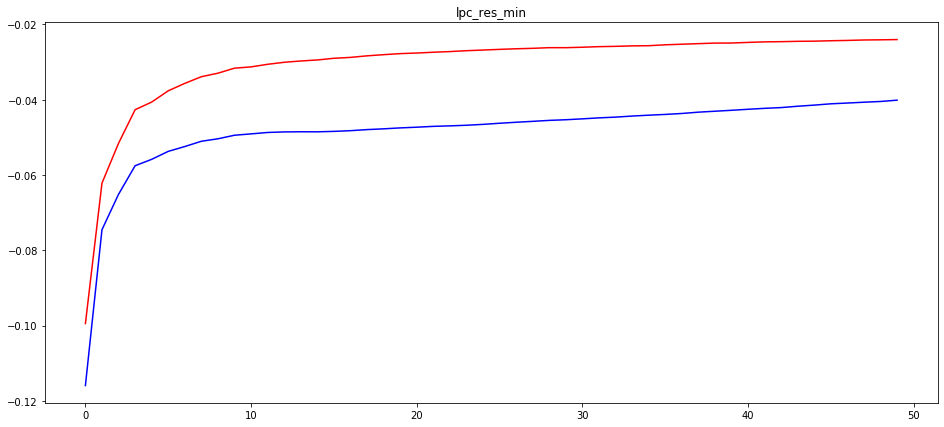

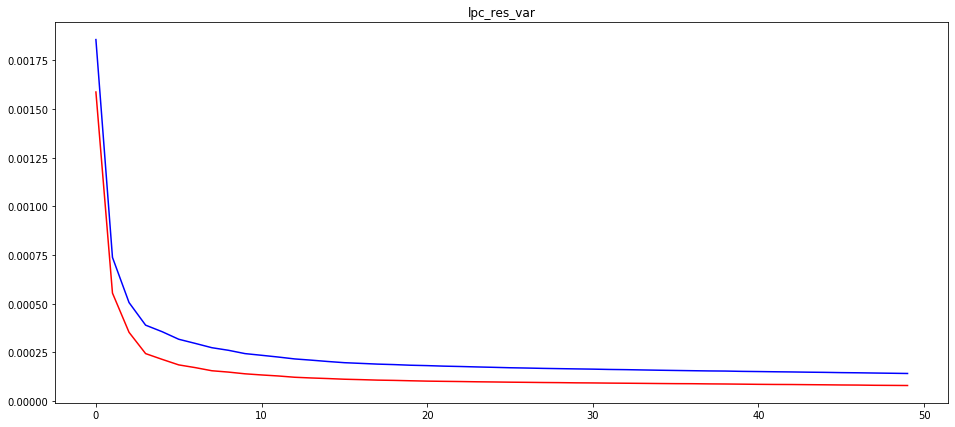

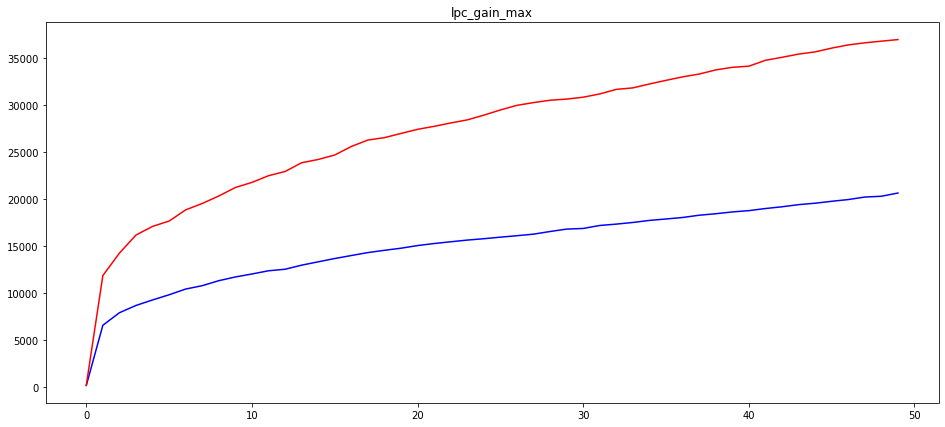

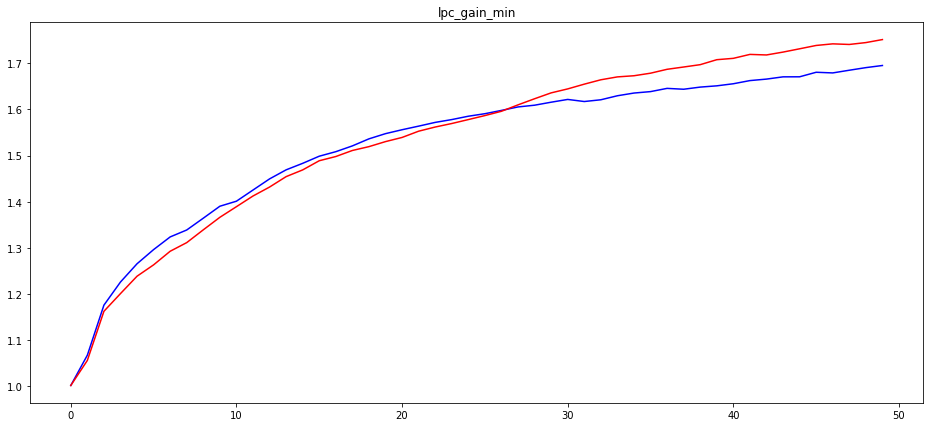

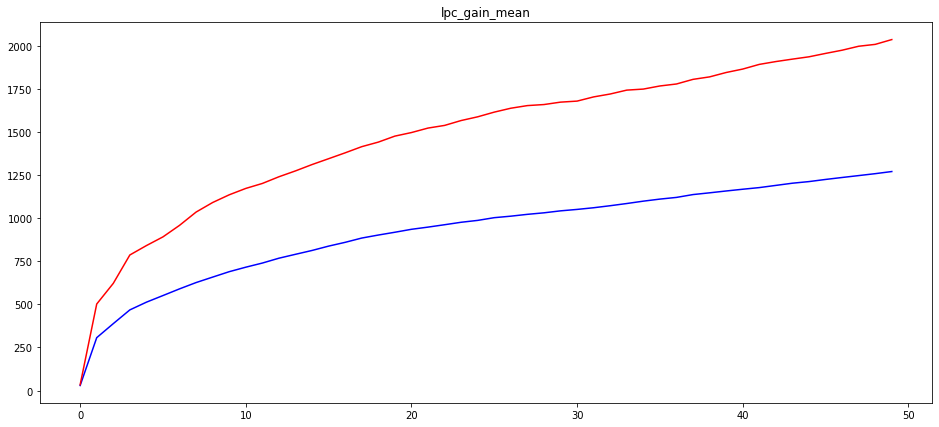

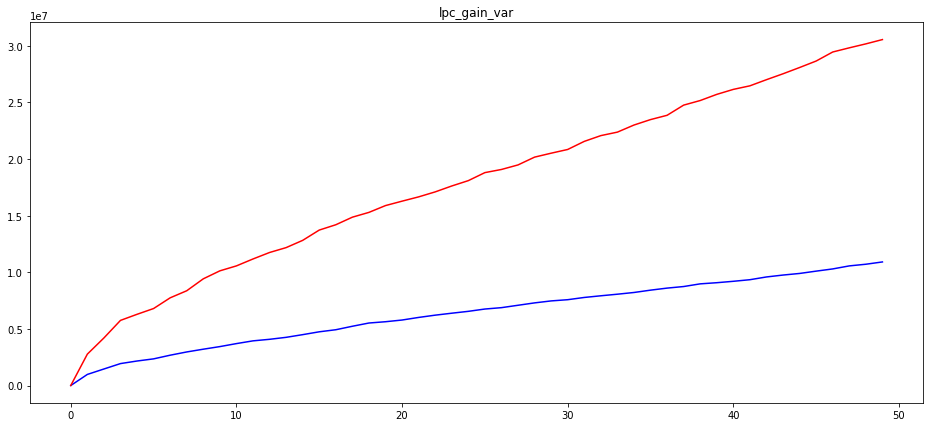

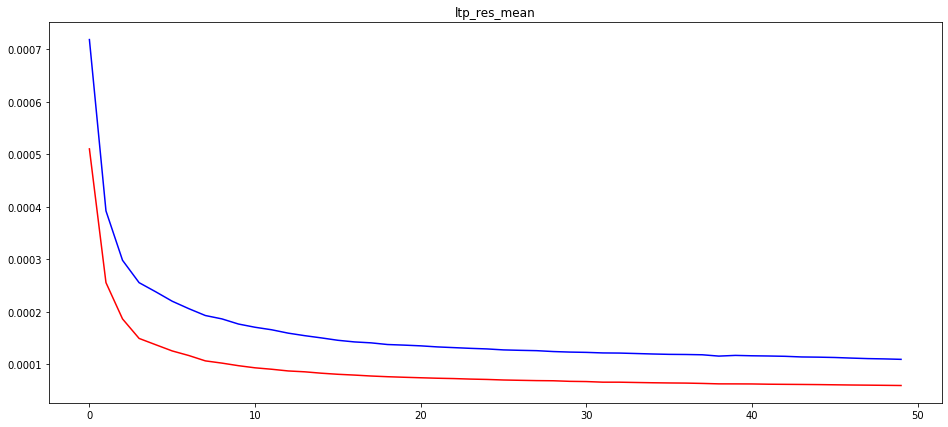

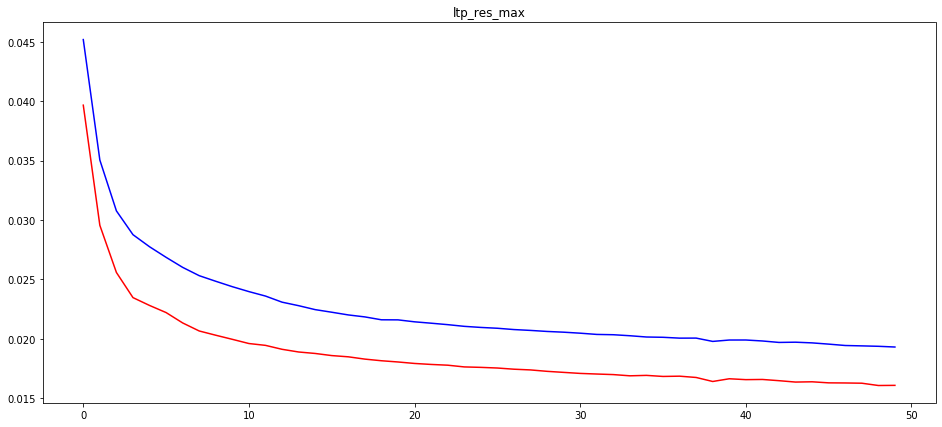

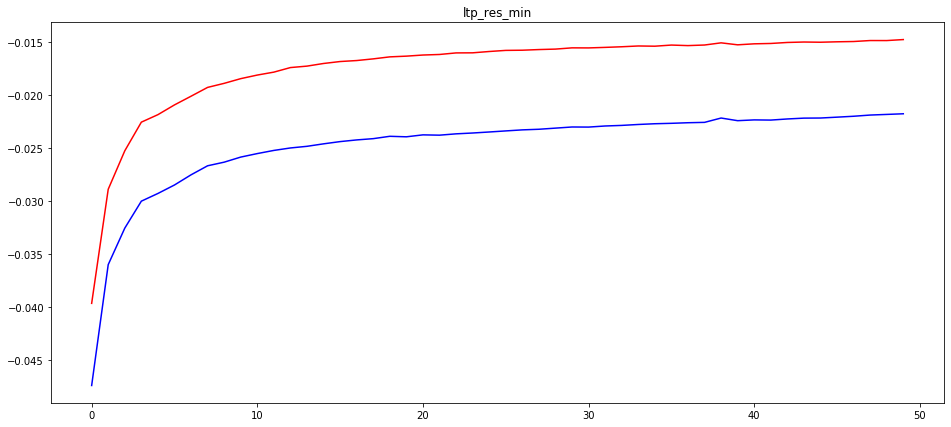

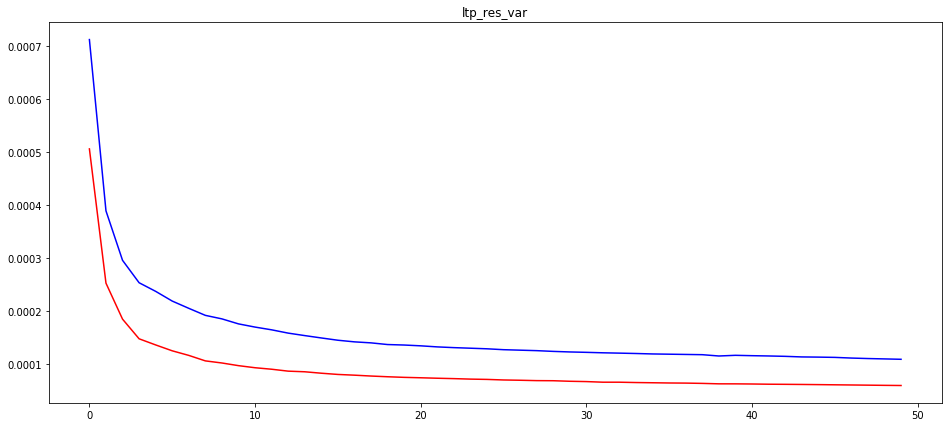

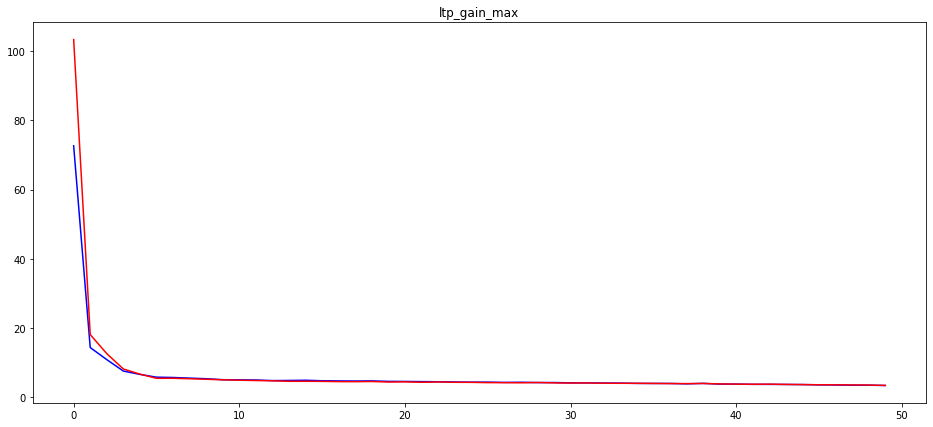

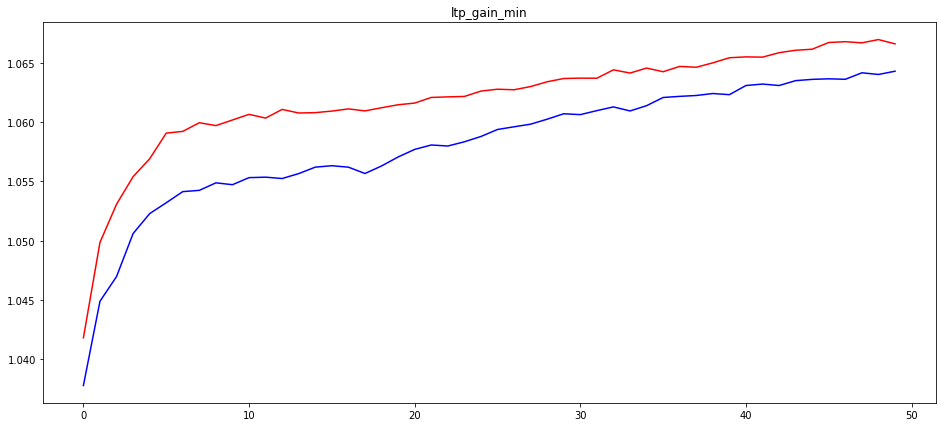

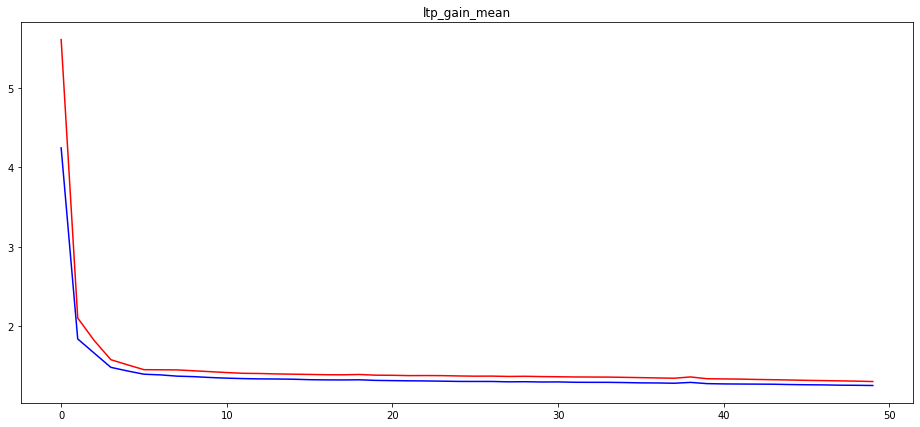

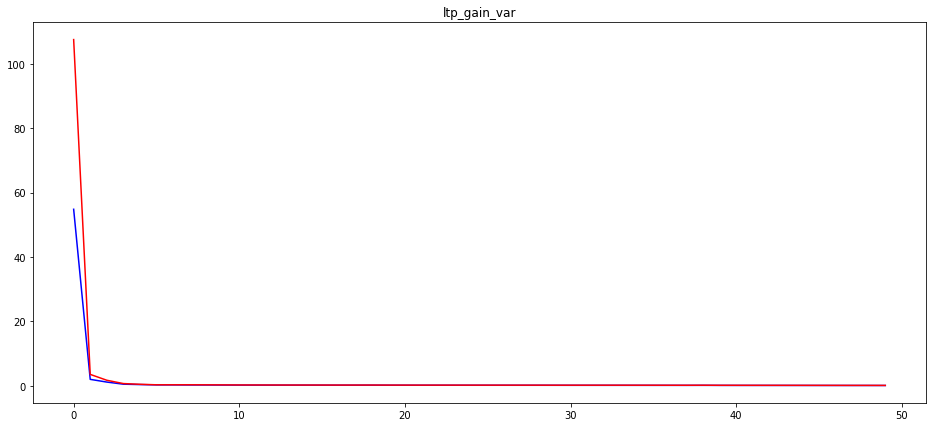

In [11]:
for i in np.arange(16):
    plt.figure(figsize=(16,7))
    feature_index = i
    plt.plot(np.nanmedian(X_dev_bonafide[:, feature_index::16], axis=0), color='blue')
    plt.plot(np.nanmedian(X_dev_spoof[:, feature_index::16], axis=0), color='red')
    plt.title(feature_list[i])

### Extract eval features

In [12]:
X_eval_bonafide_list = []
X_eval_spoof_list = []

for l in lpc_lengths:
    eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/eval_LPC_' + str(l) +'.pkl')
    #eval_features = eval_features[~eval_features['audio_filename'].isin(excluded_files)]
    #eval_features.drop('coeff', axis=1, inplace=True)
    eval_features.dropna(inplace=True)

    eval_bonafide_features = eval_features[eval_features['label']=='bonafide']
    eval_spoof_features= eval_features[eval_features['label']=='spoof']
    
    if l==1:
        eval_spoof_features = eval_features[eval_features['label']=='spoof'].sample(n=eval_bonafide_features.shape[0])
        selected_files = eval_spoof_features['audio_filename']
    else:
        eval_spoof_features = eval_spoof_features[eval_spoof_features['audio_filename'].isin(selected_files)]
    
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_var']).reshape((-1, 1)))

    X_eval_spoof_list.append(np.array(eval_spoof_features['lpc_res_mean']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['lpc_res_max']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['lpc_res_min']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['lpc_res_var']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['lpc_gain_max']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['lpc_gain_min']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['lpc_gain_var']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['ltp_res_mean']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['ltp_res_max']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['ltp_res_min']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['ltp_res_var']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['ltp_gain_max']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['ltp_gain_min']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
    X_eval_spoof_list.append(np.array(eval_spoof_features['ltp_gain_var']).reshape((-1, 1)))

In [13]:
X_eval_bonafide = np.concatenate(X_eval_bonafide_list, axis=1)
X_eval_spoof = np.concatenate(X_eval_spoof_list, axis=1)
X_eval = np.concatenate((X_eval_bonafide, X_eval_spoof), axis=0)

y_eval_bonafide = np.ones((X_eval_bonafide.shape[0],))
y_eval_spoof = np.zeros((X_eval_spoof.shape[0],))

y_eval = np.concatenate((y_eval_bonafide, y_eval_spoof), axis=0)

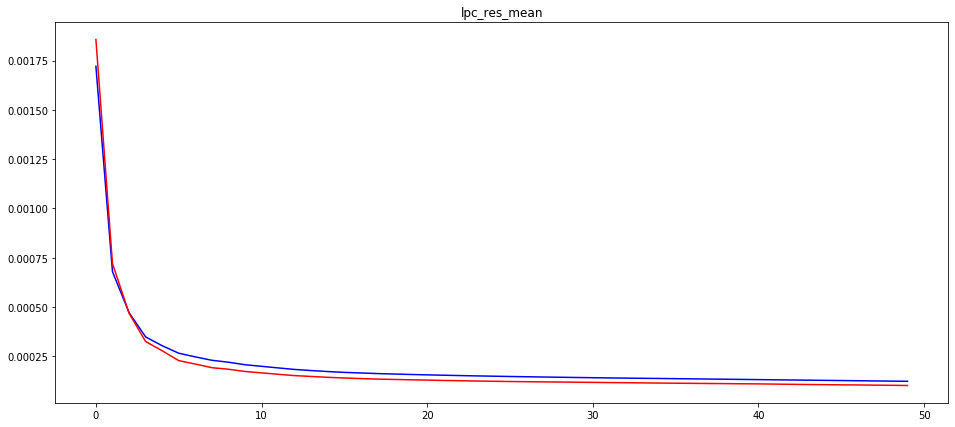

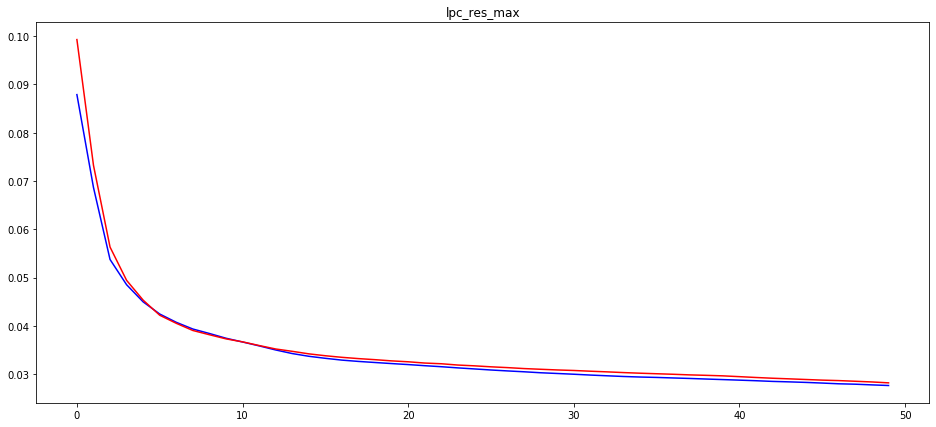

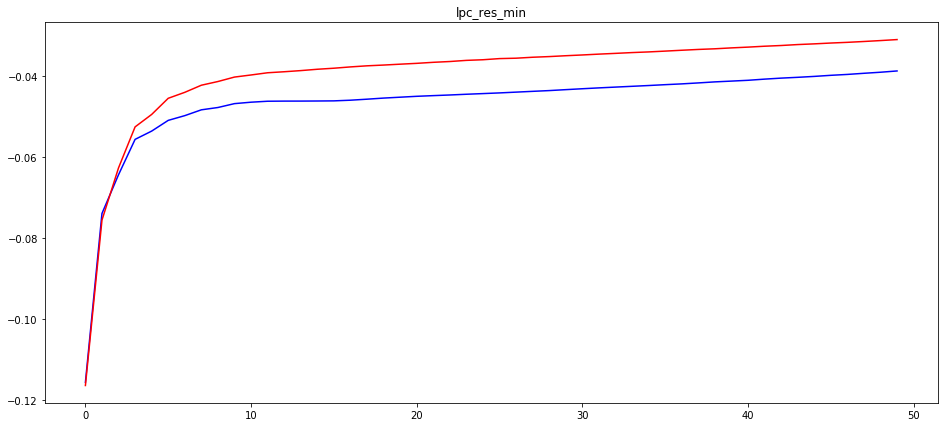

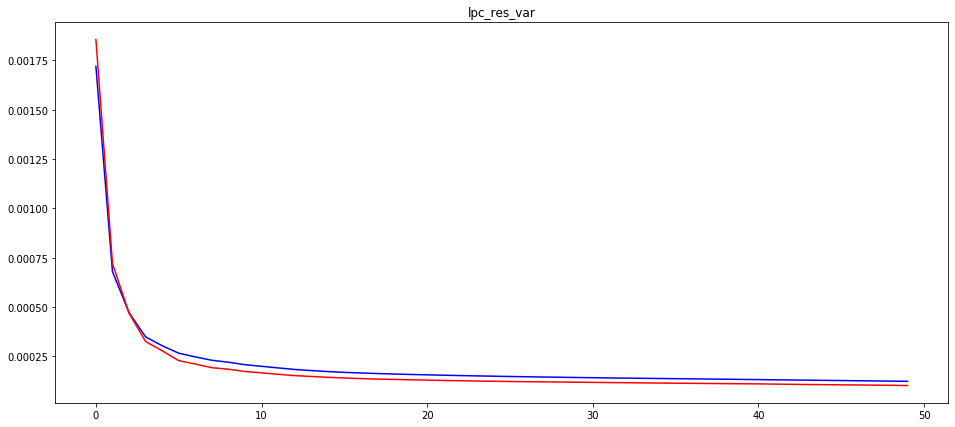

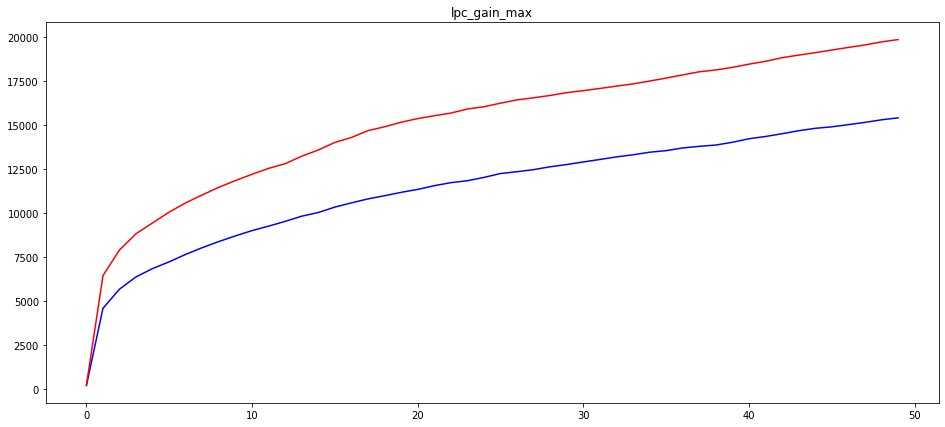

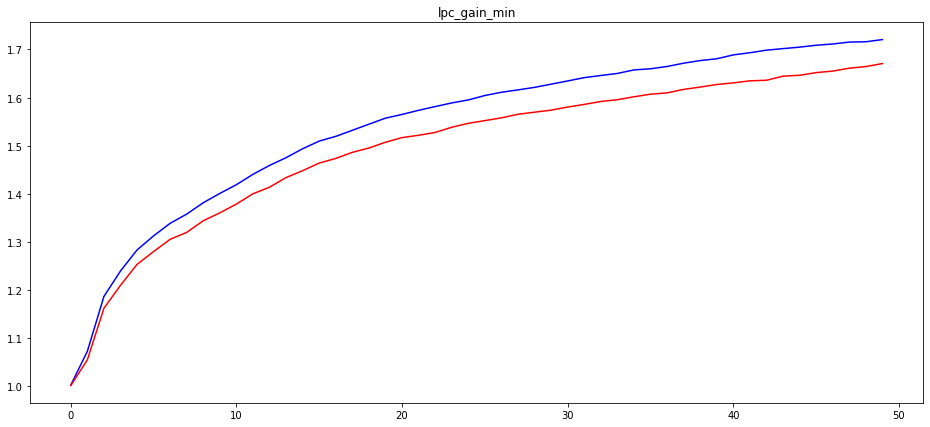

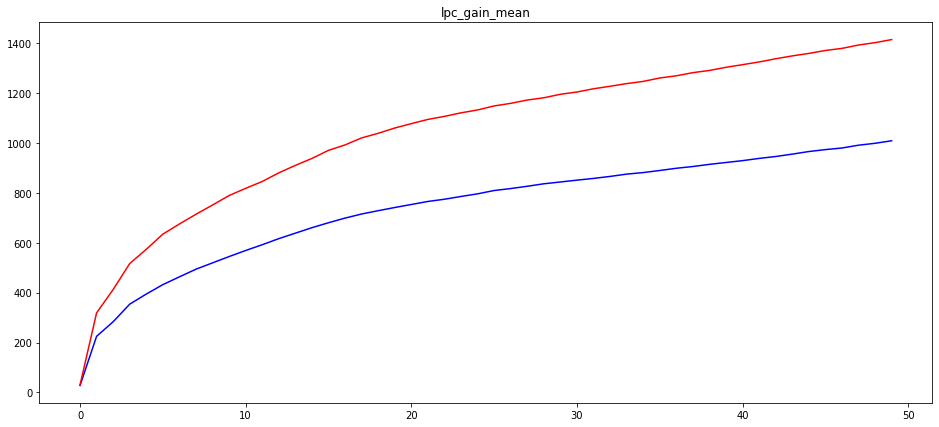

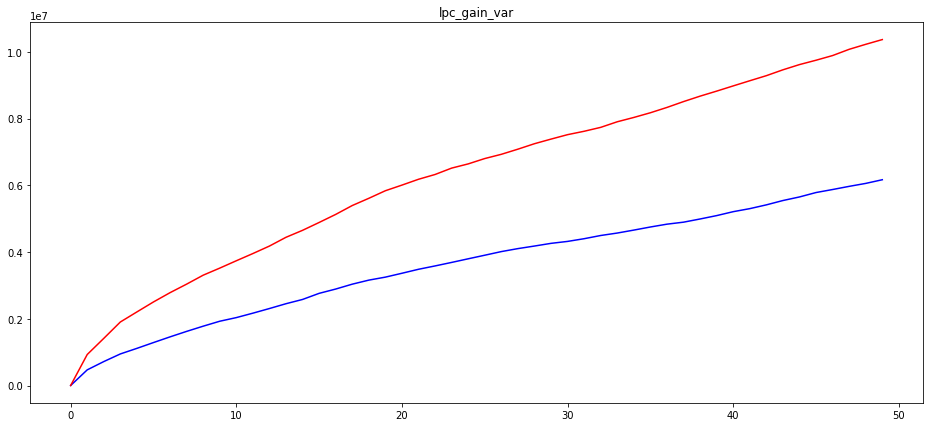

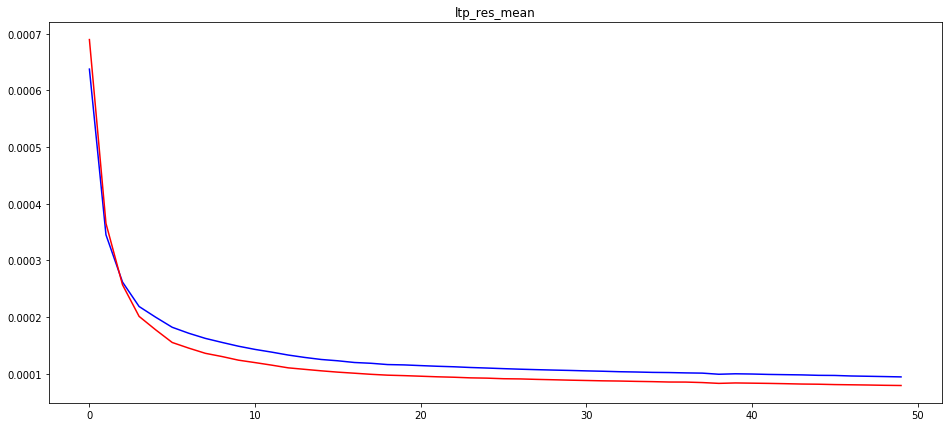

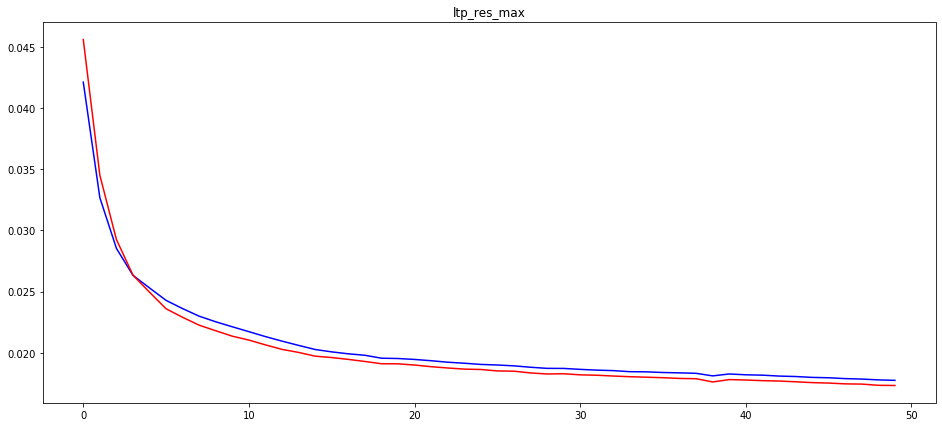

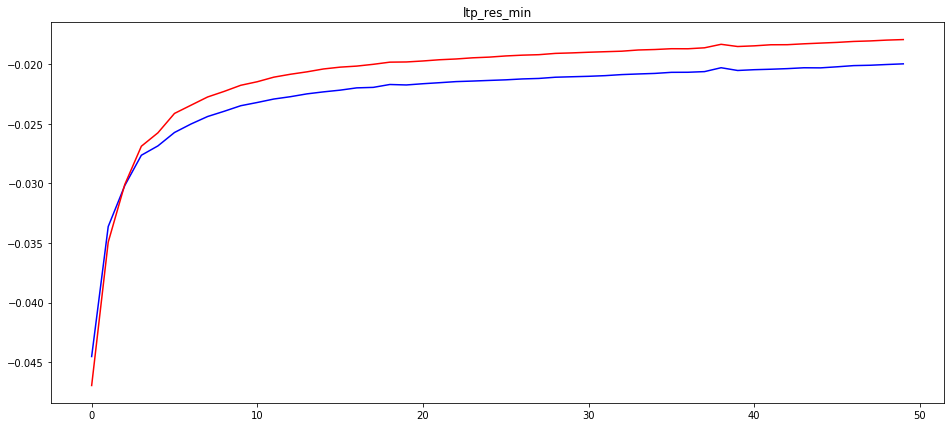

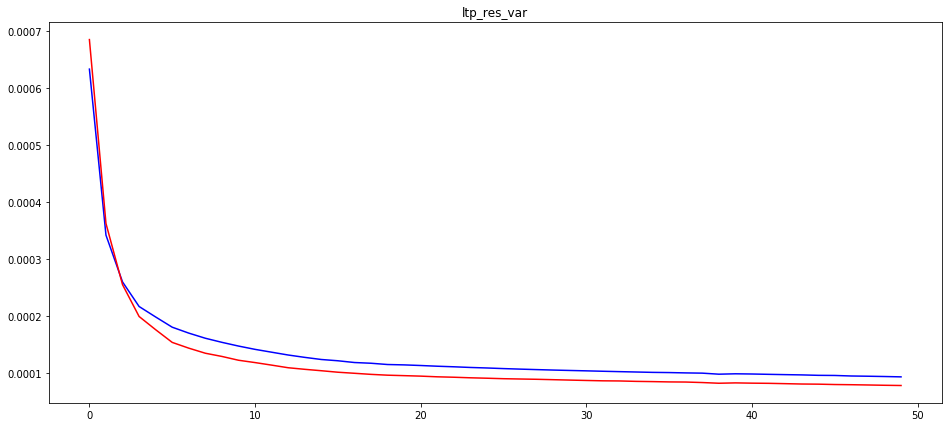

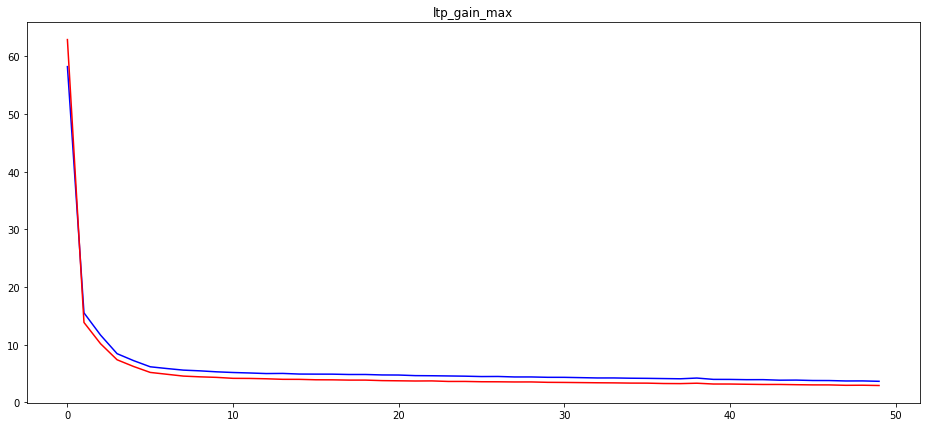

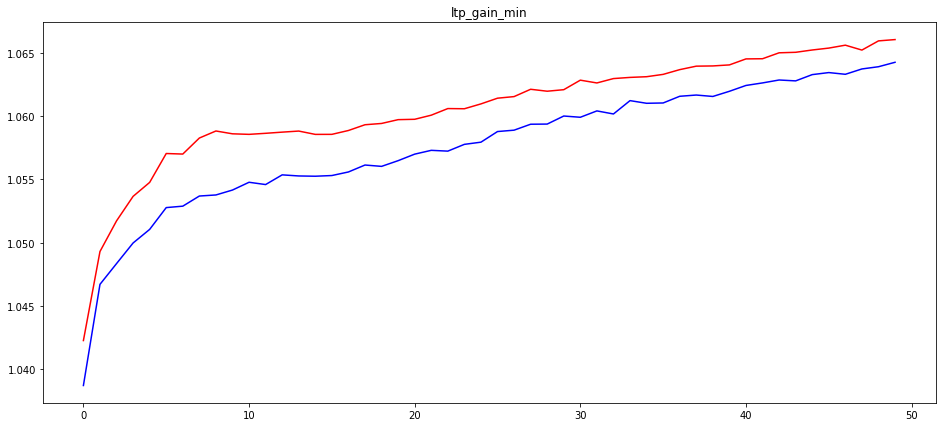

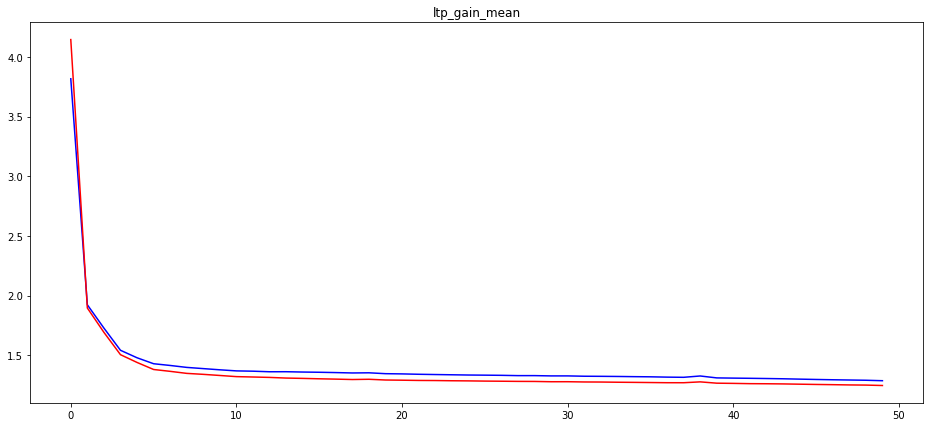

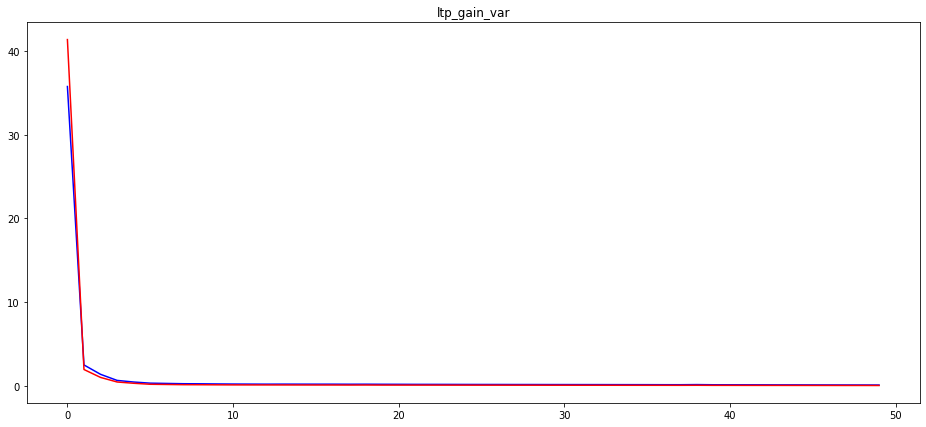

In [14]:
for i in np.arange(16):
    plt.figure(figsize=(16,7))
    feature_index = i
    plt.plot(np.nanmedian(X_eval_bonafide[:, feature_index::16], axis=0), color='blue')
    plt.plot(np.nanmedian(X_eval_spoof[:, feature_index::16], axis=0), color='red')
    plt.title(feature_list[i])

## Check nan inf and max value

In [15]:
print(np.all(np.isfinite(X_train)))
print(np.any(np.isnan(X_train)))
print(np.max(np.abs(X_train)))
print(np.finfo(np.float32).max)

True
False
8.117895382667715e+26
3.4028235e+38


In [16]:
is_float = X_train.dtype.kind in 'fc'

from sklearn.utils.extmath import _safe_accumulator_op

np.isfinite(_safe_accumulator_op(np.sum, X_train))

True

In [17]:
X_dev[X_dev >= np.finfo(np.float32).max] = np.finfo(np.float32).max
X_train[X_train >= np.finfo(np.float32).max] = np.finfo(np.float32).max
X_eval[X_eval >= np.finfo(np.float32).max] = np.finfo(np.float32).max

### Train and test the model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_dev = poly.fit_transform(X_dev)
X_eval = poly.fit_transform(X_eval)

In [18]:
from sklearn.svm import SVC


clf = RandomForestClassifier(n_estimators=20, class_weight='balanced', random_state=2)
#clf = SVC()
clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [19]:
print(clf.score(X_dev, y_dev))
print(clf.score(X_eval, y_eval))

0.9093918080264791
0.7990056818181818


[0.5]
0.9093918080264791


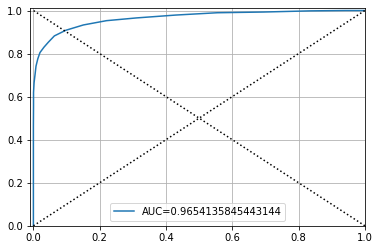

In [20]:
y_dev_hat = clf.predict_proba(X_dev)[:, 0]

[fpr, tpr, th] = roc_curve(y_dev, y_dev_hat, pos_label=0)
roc_auc = 1 - roc_auc_score(y_dev, y_dev_hat)

acc = (tpr + (1-fpr)) / 2
best_th = th[np.where(acc == np.max(acc))]
print(best_th)
print(acc.max())

plt.plot(fpr, tpr, label='AUC={}'.format(roc_auc))
plt.plot([0, 1], [0, 1], ':k')
plt.plot([1, 0], [0, 1], ':k')
plt.axis([-0.01, 1, 0, 1.01])
plt.grid(True)
plt.legend()
plt.show()

[0.4]
0.81171875


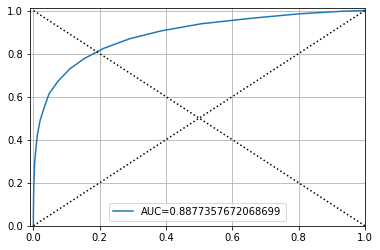

In [21]:
y_eval_hat = clf.predict_proba(X_eval)[:, 0]

[fpr, tpr, th] = roc_curve(y_eval, y_eval_hat, pos_label=0)
roc_auc = 1 - roc_auc_score(y_eval, y_eval_hat)

acc = (tpr + (1-fpr)) / 2
best_th = th[np.where(acc == np.max(acc))]
print(best_th)
print(acc.max())

plt.plot(fpr, tpr, label='AUC={}'.format(roc_auc))
plt.plot([0, 1], [0, 1], ':k')
plt.plot([1, 0], [0, 1], ':k')
plt.axis([-0.01, 1, 0, 1.01])
plt.grid(True)
plt.legend()
plt.show()

In [22]:
def obtain_asv_error_rates(tar_asv, non_asv, spoof_asv, asv_threshold):

    # False alarm and miss rates for ASV
    Pfa_asv = sum(non_asv >= asv_threshold) / non_asv.size
    Pmiss_asv = sum(tar_asv < asv_threshold) / tar_asv.size

    # Rate of rejecting spoofs in ASV
    if spoof_asv.size == 0:
        Pmiss_spoof_asv = None
    else:
        Pmiss_spoof_asv = np.sum(spoof_asv < asv_threshold) / spoof_asv.size

    return Pfa_asv, Pmiss_asv, Pmiss_spoof_asv


def compute_det_curve(target_scores, nontarget_scores):

    n_scores = target_scores.size + nontarget_scores.size
    all_scores = np.concatenate((target_scores, nontarget_scores))
    labels = np.concatenate((np.ones(target_scores.size), np.zeros(nontarget_scores.size)))

    # Sort labels based on scores
    indices = np.argsort(all_scores, kind='mergesort')
    labels = labels[indices]

    # Compute false rejection and false acceptance rates
    tar_trial_sums = np.cumsum(labels)
    nontarget_trial_sums = nontarget_scores.size - (np.arange(1, n_scores + 1) - tar_trial_sums)

    frr = np.concatenate((np.atleast_1d(0), tar_trial_sums / target_scores.size))  # false rejection rates
    far = np.concatenate((np.atleast_1d(1), nontarget_trial_sums / nontarget_scores.size))  # false acceptance rates
    thresholds = np.concatenate((np.atleast_1d(all_scores[indices[0]] - 0.001), all_scores[indices]))  # Thresholds are the sorted scores

    return frr, far, thresholds

def compute_eer(target_scores, nontarget_scores):
    """ Returns equal error rate (EER) and the corresponding threshold. """
    frr, far, thresholds = compute_det_curve(target_scores, nontarget_scores)
    abs_diffs = np.abs(frr - far)
    min_index = np.argmin(abs_diffs)
    eer = np.mean((frr[min_index], far[min_index]))
    return eer, thresholds[min_index]

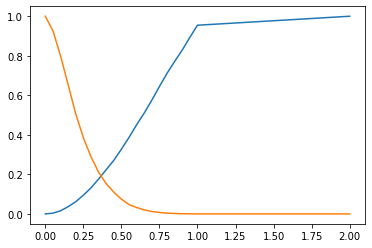

(0.09764170459247, 0.45)


In [23]:
target_score = y_dev_hat[np.where(y_dev==0)]
nontarget_score = y_dev_hat[np.where(y_dev==1)]

fnr = 1-tpr

plt.figure()
plt.plot(th, fnr)
plt.plot(th, fpr)
#plt.plot(th, np.abs(fnr-fpr))
plt.show()

print(compute_eer(target_score, nontarget_score))

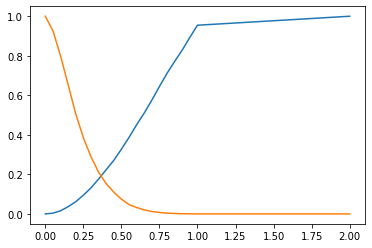

(0.21136363636363636, 0.35)

In [24]:
target_score = y_eval_hat[np.where(y_eval==0)]
nontarget_score = y_eval_hat[np.where(y_eval==1)]

fnr = 1-tpr

plt.figure()
plt.plot(th, fnr)
plt.plot(th, fpr)
#plt.plot(th, np.abs(fnr-fpr))
plt.show()

compute_eer(target_score, nontarget_score)

In [25]:
clf.predict_proba(X_eval)[:,0]

array([0.3 , 0.05, 0.  , ..., 0.5 , 0.6 , 0.5 ])

### Train on both train and dev, test on eval

In [26]:
X_bonafide = np.concatenate((X_train_bonafide, X_dev_bonafide), axis=0)
X_spoof = np.concatenate((X_train_spoof, X_dev_spoof), axis=0)
                
X = np.concatenate((X_bonafide, X_spoof), axis=0)

In [27]:
y_bonafide = np.ones([X_bonafide.shape[0],])
y_spoof = np.zeros([X_spoof.shape[0],])

y = np.concatenate((y_bonafide, y_spoof), axis=0)


In [28]:
X[X >= np.finfo(np.float32).max] = np.finfo(np.float32).max

In [29]:
from sklearn.svm import SVC

clf2 = RandomForestClassifier(n_estimators=20, class_weight='balanced', random_state=2)
#clf = SVC()
clf2.fit(X, y)  

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [30]:
print(clf2.score(X_eval, y_eval))

0.8075994318181818


[0.4]
0.8295454545454546


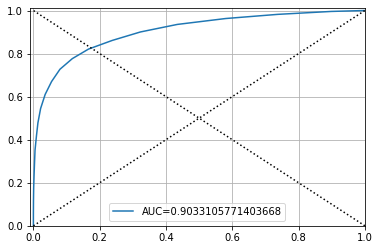

In [31]:
y_eval_hat = clf2.predict_proba(X_eval)[:, 0]

[fpr, tpr, th] = roc_curve(y_eval, y_eval_hat, pos_label=0)
roc_auc = 1 - roc_auc_score(y_eval, y_eval_hat)

acc = (tpr + (1-fpr)) / 2
best_th = th[np.where(acc == np.max(acc))]
print(best_th)
print(acc.max())

plt.plot(fpr, tpr, label='AUC={}'.format(roc_auc))
plt.plot([0, 1], [0, 1], ':k')
plt.plot([1, 0], [0, 1], ':k')
plt.axis([-0.01, 1, 0, 1.01])
plt.grid(True)
plt.legend()
plt.show()

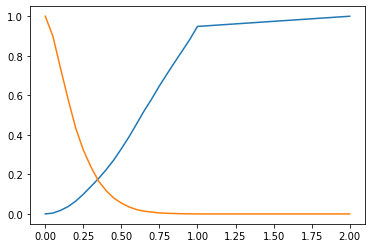

(0.17911931818181817, 0.3)

In [32]:
target_score = y_eval_hat[np.where(y_eval==0)]
nontarget_score = y_eval_hat[np.where(y_eval==1)]

fnr = 1-tpr

plt.figure()
plt.plot(th, fnr)
plt.plot(th, fpr)
#plt.plot(th, np.abs(fnr-fpr))
plt.show()

compute_eer(target_score, nontarget_score)